In [2]:
# ───────────────────────────────────────────────────────────────────────────────
# 📦 Standard Library Imports
# ───────────────────────────────────────────────────────────────────────────────
import os
import sys
import time
import csv
import json
from pathlib import Path

# ───────────────────────────────────────────────────────────────────────────────
# 📚 Scientific & Data Libraries
# ───────────────────────────────────────────────────────────────────────────────
import numpy as np
import matplotlib.pyplot as plt

# ───────────────────────────────────────────────────────────────────────────────
# 🌍 Third-Party Library Imports (PyTorch)
# ───────────────────────────────────────────────────────────────────────────────
import torch
import torch.optim as optim
import torchvision.transforms.functional as TF

# ───────────────────────────────────────────────────────────────────────────────
# 🧩 Custom Project Modules
# ───────────────────────────────────────────────────────────────────────────────
sys.path.append('C:/Users/nnobi/Desktop/FIUBA/Tesis/Project')

from project_package.utils import train_common_routines as tcr
from project_package.conv_net.ConvNet_model import SRCNN
from project_package.dataset_manager.webdataset_dataset import PtWebDataset
from project_package.data_processing.sen2venus_routines import load_files_tensor_data

torch.Size([129, 3, 256, 256])
torch.Size([129, 3, 256, 256])
Baja resolución shape: 1.0
Alta resolución shape: 1.0
Par 0: PSNR = 22.19 dB
Par 1: PSNR = 26.25 dB
Par 2: PSNR = 28.59 dB
Par 3: PSNR = 35.36 dB
Par 4: PSNR = 14.86 dB


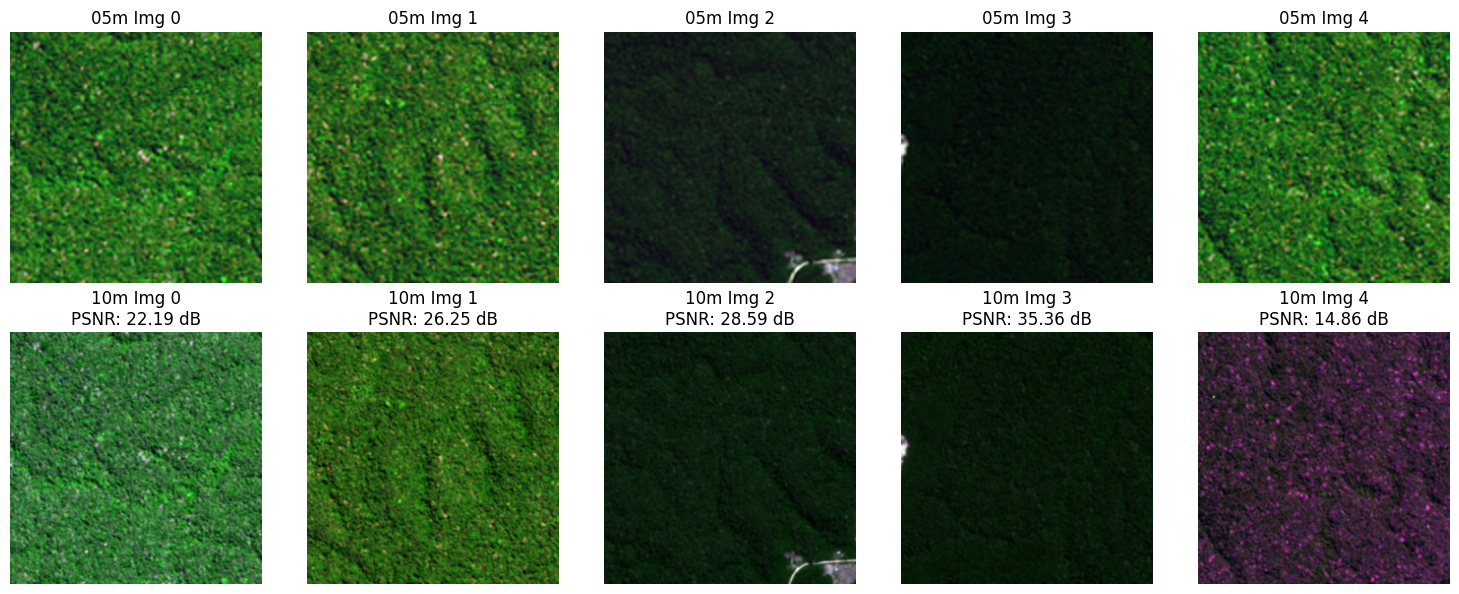

22.010715


In [3]:
import torch
import matplotlib.pyplot as plt
import os
import numpy as np

def psnr(img1, img2, max_val=1.):
    """
    Compute Peak Signal to Noise Ratio (the higher the better).
    PSNR = 20 * log10(MAXp) - 10 * log10(MSE).
    """
    img1 = img1.clamp(0,1).cpu().detach().numpy()
    img2 = img2.clamp(0,1).cpu().detach().numpy()
    img_diff = img1 - img2
    rmse = np.sqrt(np.mean((img_diff) ** 2, axis=(-3,-2,-1)))
    PSNR = np.mean(20 * np.log10(max_val / rmse))
    return PSNR

# Ruta a la carpeta con los archivos .pt
folder_path = "C:/Users/nnobi/Desktop/FIUBA/Tesis/Project/datasets/my_dataset4"

# Rutas de los archivos de baja y alta resolución
low_res_file = os.path.join(folder_path, "10m.pt")
high_res_file = os.path.join(folder_path, "05m.pt")

data_l, data_h = load_files_tensor_data(low_res_file, high_res_file, scale_value=10000)

# Número de imágenes a mostrar
num_images = 5

def show_image_pairs_with_psnr(tensor_l, tensor_h, num_images=5):
    tensor_l = tensor_l[:num_images].cpu()
    tensor_h = tensor_h[:num_images].cpu()

    fig, axes = plt.subplots(2, num_images, figsize=(num_images * 3, 6))

    for i in range(num_images):
        img_l = tensor_l[i].permute(1, 2, 0).numpy()
        img_h = tensor_h[i].permute(1, 2, 0).numpy()

        # Calcular PSNR del par
        psnr_val = psnr(tensor_l[i].unsqueeze(0), tensor_h[i].unsqueeze(0))
        print(f"Par {i}: PSNR = {psnr_val:.2f} dB")

        # Mostrar baja resolución
        axes[0, i].imshow(img_l)
        axes[0, i].axis("off")
        axes[0, i].set_title(f"05m Img {i}")

        # Mostrar alta resolución con PSNR
        axes[1, i].imshow(img_h)
        axes[1, i].axis("off")
        axes[1, i].set_title(f"10m Img {i}\nPSNR: {psnr_val:.2f} dB")

    plt.tight_layout()
    plt.show()

# Mostrar imágenes de a pares con PSNR
print(f"Baja resolución shape: {data_l.max()}")
print(f"Alta resolución shape: {data_h.max()}")
show_image_pairs_with_psnr(data_l, data_h, num_images=num_images)

print(psnr(data_h,data_l))